  Job ID            Job Title Company Name Job Location    Job Type  \
0   JOB1    Software Engineer       Amazon    Ahmedabad   Full-time   
1   JOB2  Marketing Executive      Infosys    Ahmedabad  Internship   
2   JOB3    Financial Analyst     Deloitte       Jaipur    Contract   
3   JOB4     Business Analyst       Amazon        Delhi   Full-time   
4   JOB5    Software Engineer      Infosys        Delhi   Full-time   

  Salary Range Experience Required Posted Date Application Deadline  \
0      5-8 LPA           2-5 years  2025-01-16           2025-01-25   
1      5-8 LPA           2-5 years  2024-12-25           2025-01-19   
2      20+ LPA          5-10 years  2025-01-22           2025-01-29   
3      20+ LPA           2-5 years  2025-01-07           2025-02-06   
4    12-20 LPA           10+ years  2024-12-26           2025-01-08   

   Job Portal  Number of Applicants Education Requirement  \
0    LinkedIn                    23                   PhD   
1      Indeed           

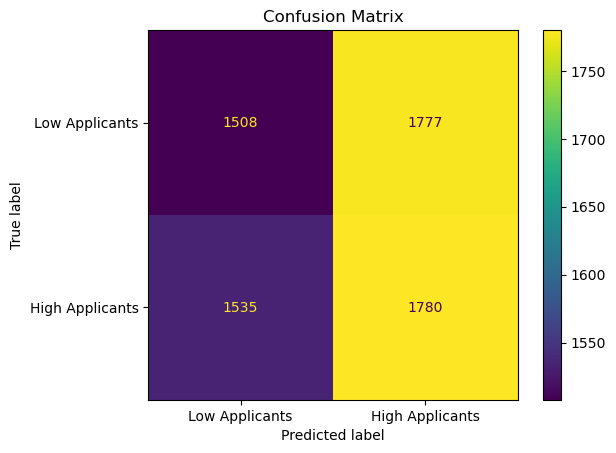

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

# Step 1: Load dataset
df = pd.read_csv('india_job_market_dataset.csv')

print(df.head())
print(df.tail())
print(df.describe())
print(df.info())

# Step 2: Create a binary target column 'high_applicants'
median_applicants = df['Number of Applicants'].median()
df['high_applicants'] = (df['Number of Applicants'] > median_applicants).astype(int)

# Step 3: Drop unnecessary or identifier columns
df = df.drop(['Job ID', 'Posted Date', 'Application Deadline', 'Number of Applicants'], axis=1)

# Step 4: Convert categorical columns to dummy variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Step 5: Define features and target
X = df.drop('high_applicants', axis=1)
y = df['high_applicants']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

# Step 7: Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

# Step 9: Evaluation
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nModel Evaluation:\n")
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ["Low Applicants", "High Applicants"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("Confusion Matrix")
plt.show()
